# Задача классификации. Метод ближайших соседей (kNN)

In [63]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
#plt.rcParams["figure.figsize"] = [8, 8]

import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)

## KNN в задаче классификации

In [64]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5]

(array([[13.78731721,  1.73323541],
        [10.68075246,  3.87600675],
        [ 8.09139034,  0.36429043],
        [10.80129018,  6.34922981],
        [ 8.78819007,  2.53766878]]),
 array([0, 1, 1, 1, 0]))

In [65]:
# у данных с таргетом 1 зелёный цвет, у данных с таргетом 0 - синий
def get_class_colour(class_label):
    return 'green' if class_label else 'blue'

In [66]:
def plot_points(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c='black', s=100, edgecolor='black')
    
    if new_prediction is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c=[get_class_colour(y_i) for y_i in new_prediction], s=100, edgecolor='black')
        
    if nearest_points is not None:
        plt.scatter(nearest_points[:, 0], nearest_points[:, 1], c='red', s=100, edgecolor='black')
    
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    
    if file_name:
        plt.savefig(file_name)

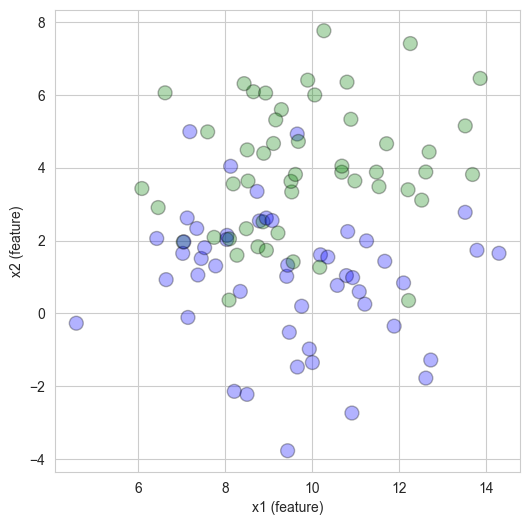

In [67]:
plot_points(X, y)

In [68]:
X_new = np.array([[12, 6]])

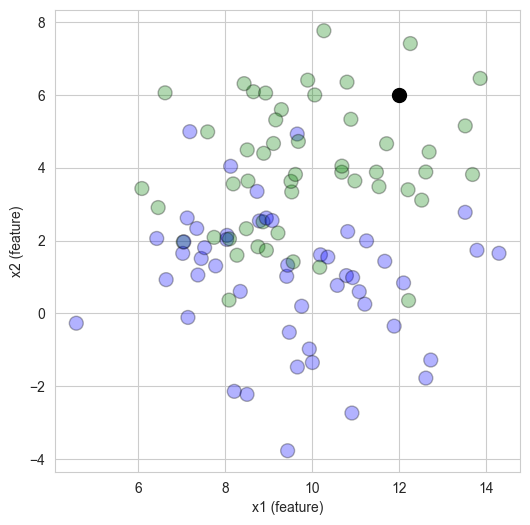

In [69]:
plot_points(X, y, new_points=X_new)

In [70]:
from scipy.spatial.distance import euclidean

def find_nearest_point_index(x_new, X):
    d_min, min_idx = np.inf, 0

    for idx in range(0, X.shape[0]):
        d = euclidean(x_new.ravel(), X[idx])
        if d < d_min: 
            d_min, min_idx = d, idx
    return min_idx


min_idx = find_nearest_point_index(X_new, X)
min_idx

3

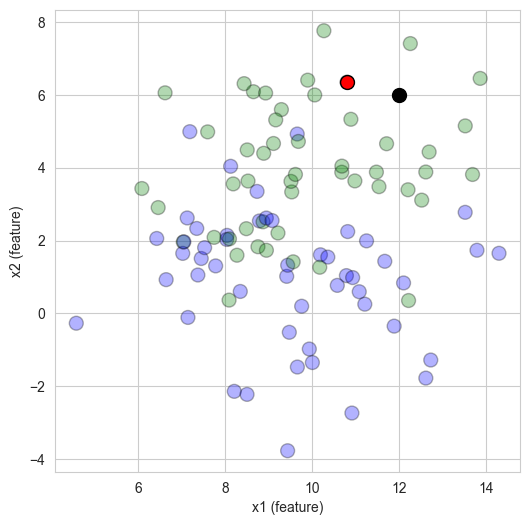

In [71]:
plot_points(X, y, new_points=X_new, nearest_points=X[[min_idx]])

In [72]:
def predict_class(x_new, X, y):
    min_idx = find_nearest_point_index(x_new, X)
    return y[min_idx]

y_new = predict_class(X_new, X, y)

In [73]:
y_new

np.int64(1)

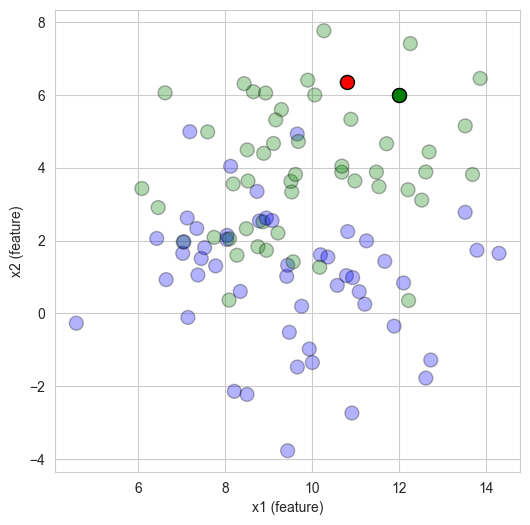

In [74]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

In [75]:
X_new = np.array([[12, -2]])
min_idx = find_nearest_point_index(X_new, X)
y_new = predict_class(X_new, X, y)

In [76]:
y_new

np.int64(0)

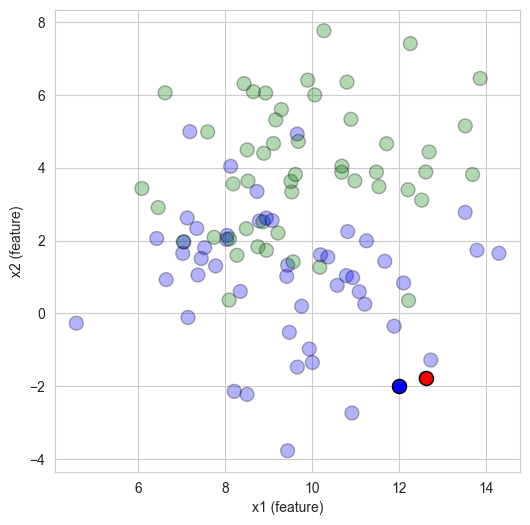

In [77]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

* k = 3

In [78]:
from scipy.spatial.distance import cdist
from collections import Counter

In [79]:
def predict_class(x_new, X, y, k=1):
    # cdist рассчитывает попарные расстояния между объектами
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
    dist = cdist(x_new, X)
    
    # argpartition находит отсортированные индексы 
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html
    nearest_y = y[np.argpartition(dist, k, axis=1)[:, :k]]
    return np.array([Counter(row).most_common(1)[0][0] for row in nearest_y])

In [80]:
X_new

array([[12, -2]])

In [81]:
y_pred = predict_class(X_new, X, y, k=3)

In [82]:
y_pred

array([0])

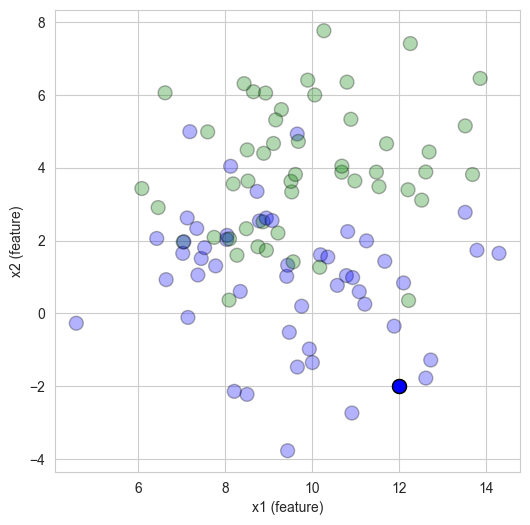

In [83]:
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

## Sklearn

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [86]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X_new)

In [87]:
y_pred

array([0])

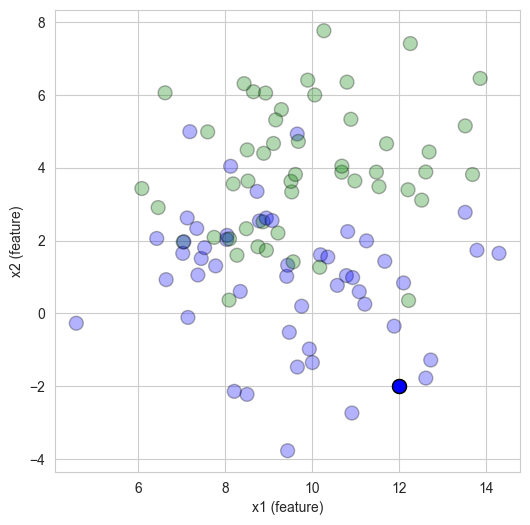

In [88]:
plot_points(X, y, new_points=X_new, new_prediction=[y_pred])

In [89]:
X_new = np.c_[np.random.randint(5, 15, 10), np.random.randint(-2, 8, 10)]

In [90]:
X_new

array([[14,  6],
       [ 9,  4],
       [ 5,  2],
       [ 6,  1],
       [14, -2],
       [ 5,  2],
       [ 6,  4],
       [13,  6],
       [14, -1],
       [ 5,  6]])

In [91]:
knn.predict(X_new)

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

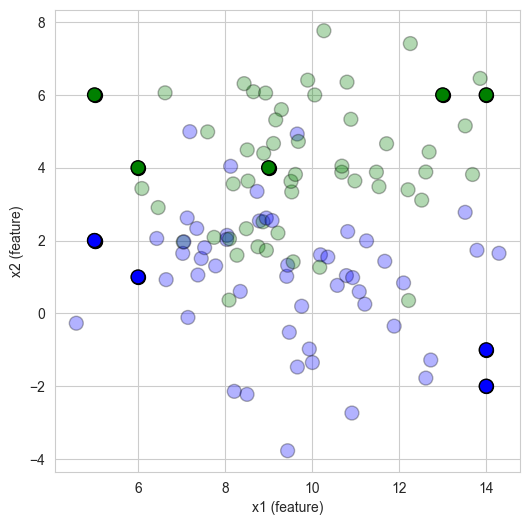

In [92]:
plot_points(X, y, new_points=X_new, new_prediction=knn.predict(X_new))

* k = 3

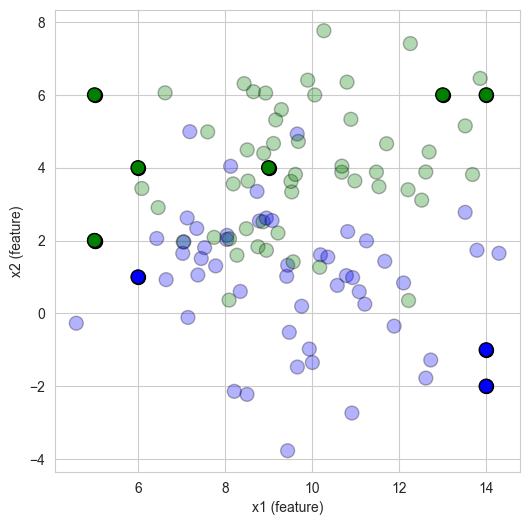

In [93]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X_new)
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

# Влияние числа соседей k

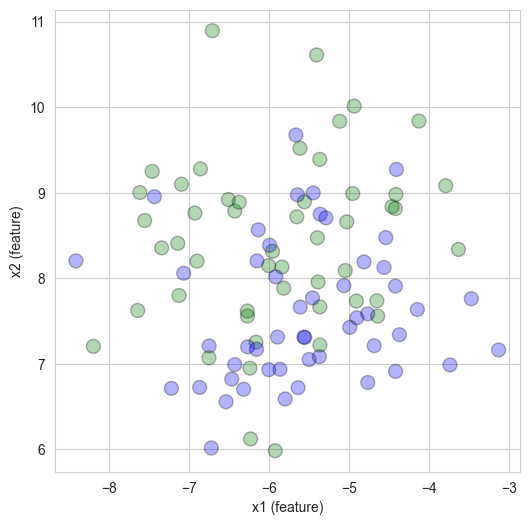

In [94]:
X, y = datasets.make_blobs(n_samples=100, random_state=5, centers=2)
plot_points(X, y)

In [95]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_pred = np.c_[xx.ravel(), yy.ravel()]

In [96]:
X.shape

(100, 2)

In [97]:
x_pred.shape

(93240, 2)

In [98]:
def plot_knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(x_pred)
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(12, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

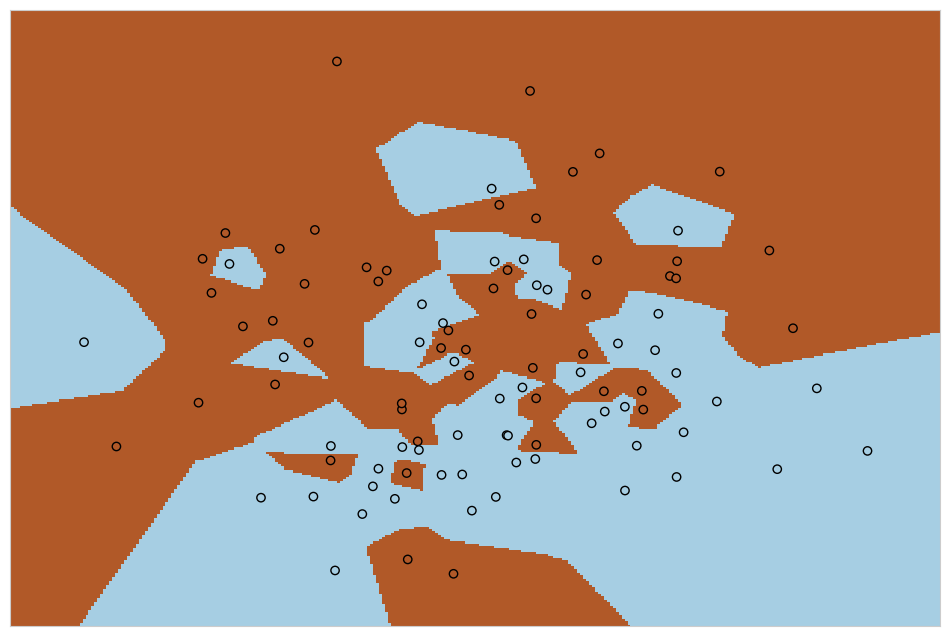

In [99]:
plot_knn_classifier(1) # похоже на диаграмму Вороного

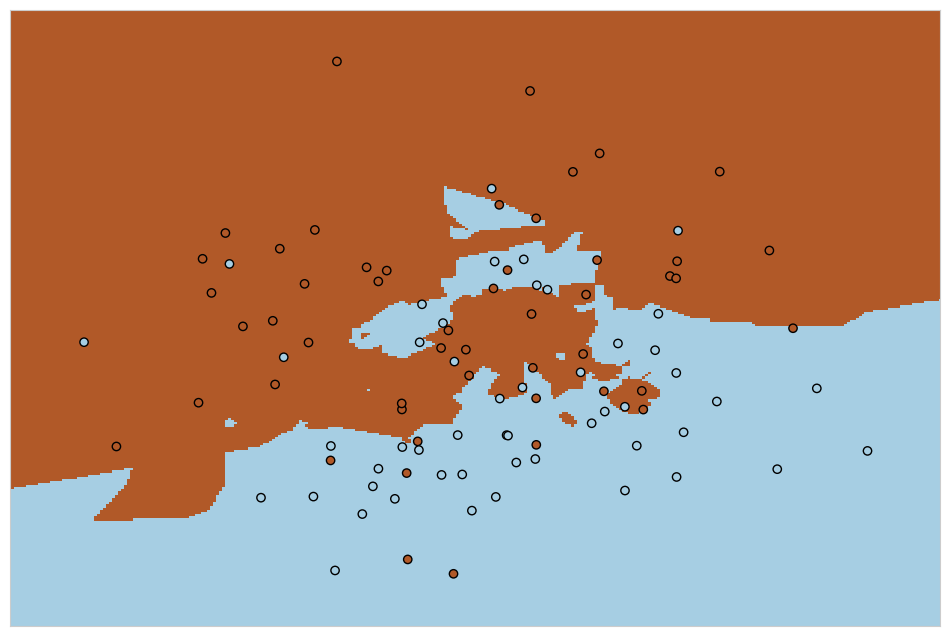

In [100]:
plot_knn_classifier(5)

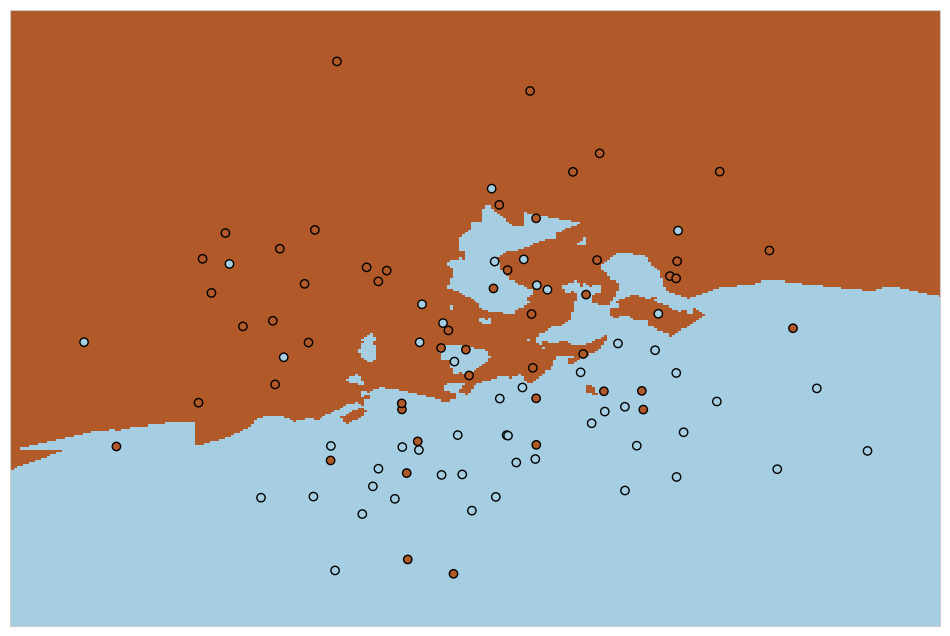

In [101]:
plot_knn_classifier(10)

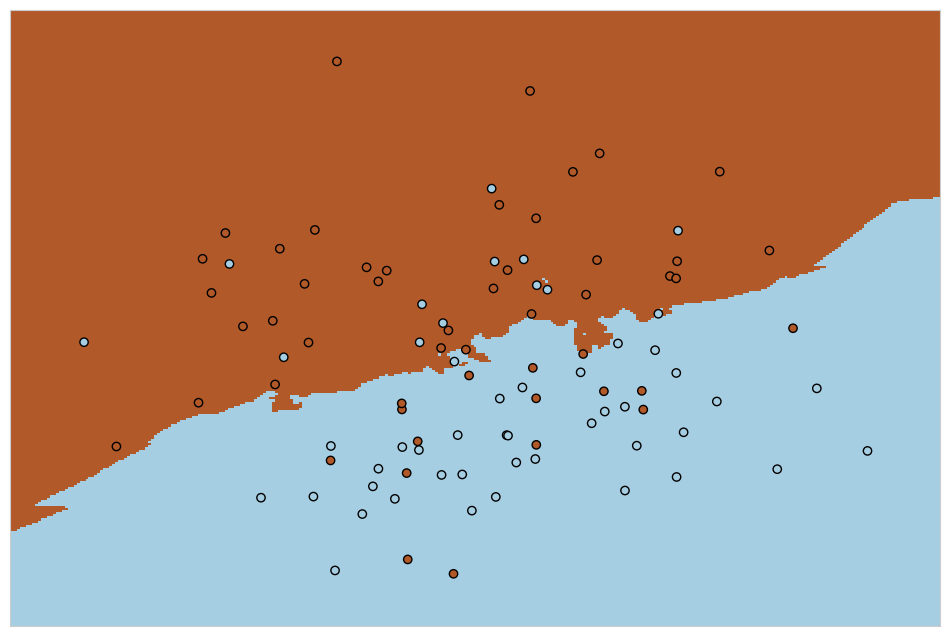

In [102]:
plot_knn_classifier(30)

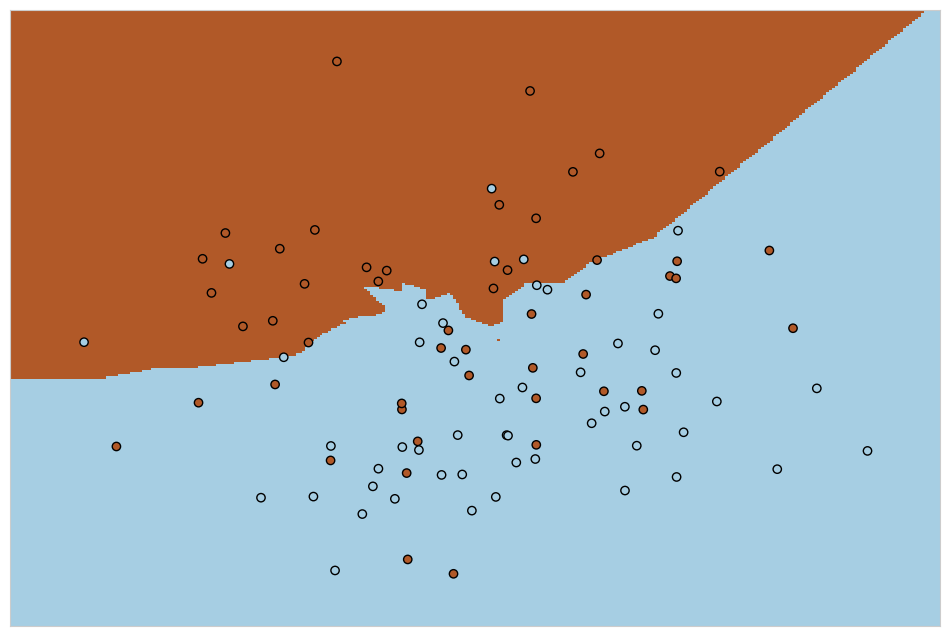

In [103]:
plot_knn_classifier(90)

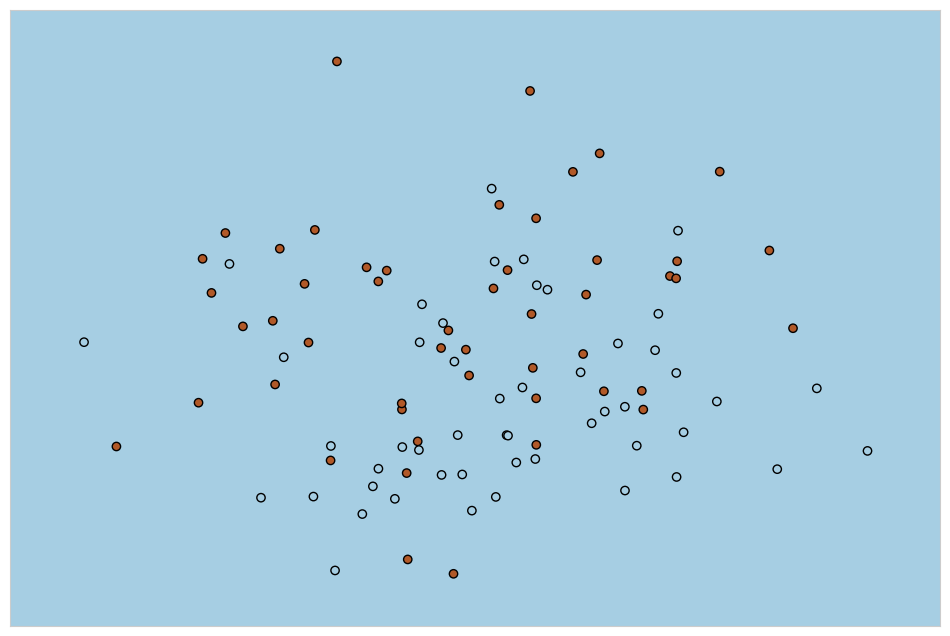

In [104]:
plot_knn_classifier(100)

# Нормализация данных в knn

In [105]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:, 1] *= 1e9
X[:5], y[:5]

(array([[1.37873172e+01, 1.73323541e+09],
        [1.06807525e+01, 3.87600675e+09],
        [8.09139034e+00, 3.64290431e+08],
        [1.08012902e+01, 6.34922981e+09],
        [8.78819007e+00, 2.53766878e+09]]),
 array([0, 1, 1, 1, 0]))

In [106]:
def plot_points_scaled(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    plt.gca().set_aspect('equal', adjustable='datalim')
    if file_name:
        plt.savefig(filename)

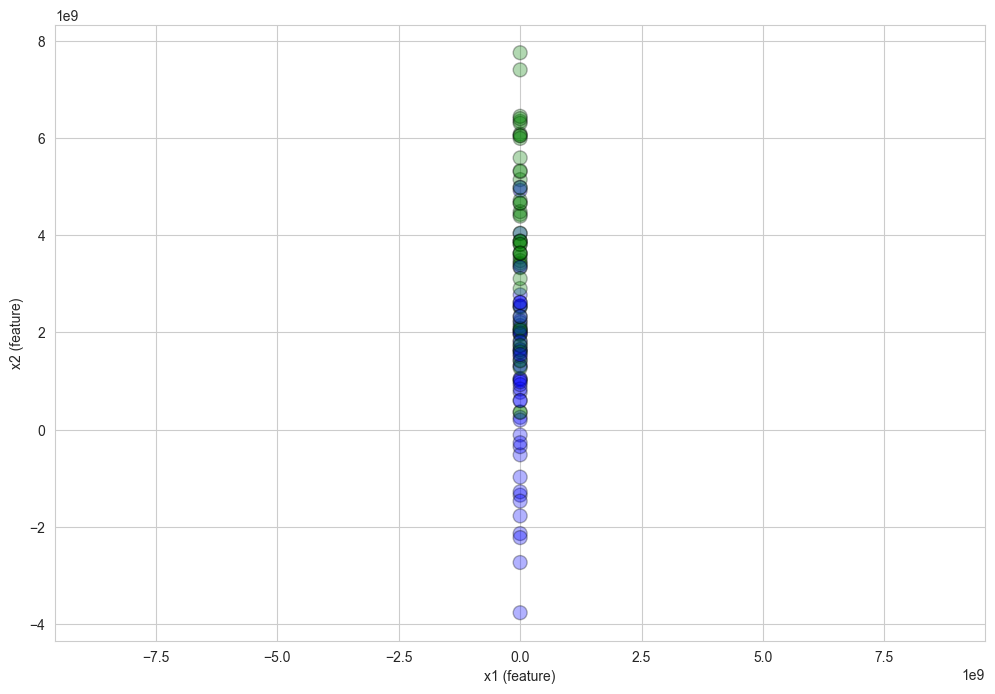

In [107]:
plot_points_scaled(X, y)

Назад в презентацию

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [109]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

In [110]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
quality(y_pred, y)

Accuracy:  0.810
Precision: 0.760
Recall:    0.844
F1-score:  0.800


In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[0.94785725, 0.47731895],
       [0.62801223, 0.66311988],
       [0.36141725, 0.35861695]])

In [112]:
X[:3]

array([[1.37873172e+01, 1.73323541e+09],
       [1.06807525e+01, 3.87600675e+09],
       [8.09139034e+00, 3.64290431e+08]])

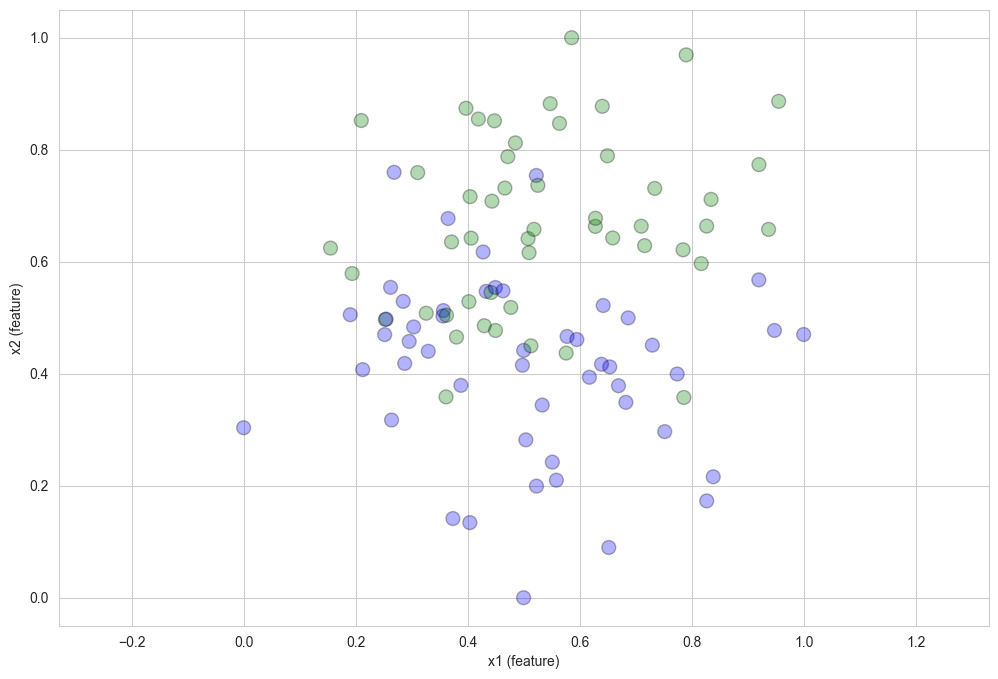

In [113]:
plot_points_scaled(X_scaled, y)

In [114]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)
quality(y_pred, y)

Accuracy:  0.870
Precision: 0.860
Recall:    0.878
F1-score:  0.869


# Метрики качества классификации

Перед тем, как строить модели, хорошо бы понять, а как мы будем измерять качество их работы? 

Мы с вами будем работать с задачей бинарной классификации, то есть возможных вариантов целевой переменной может быть всего 2. Для наглядности предположим, что предсказываем беременность. 

В этом случае у нашего алгоритма может быть 4 варианта развития событий - предсказать беременность, когда она действительно есть, предсказать её отсутствие, когда её действительно нет, или совершить один из двух типов ошибок:

![](http://blog.exsilio.com/wp-content/uploads/2016/09/table-blog.png)

* Ошибка первого рода: мы предсказали человеку, что он беременен, а по факту нет.
* Ошибка второго рода: мы предсказали, что человек не беременен, а по факту - да.


![](https://miro.medium.com/max/3200/1*fSOPZZt8Bbm-lzNQhfqRLw.jpeg)



В разных задачах критичны разные виды ошибок. На основе этих ошибок можно придумать много метрик. 


### 1) Доля верно классифицированных объектов (Accuracy):

Берем всё, что предсказали правильно, делим на число всех наблюдений

$$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$

Интуитивно понятная, очевидная и почти неиспользуемая метрика. Её главная проблема в том, что она бесполезна в задачах с неравными классами. Например, пусть у нас есть $50$ больных и $950$ здоровых. Мы хотим научиться их различать. Пусть наш алгоритм предсказывает, что все здоровы. В этом случае доля правильных ответов составит $95\%$, но алгорим окажется абсолютно бесполезным. 

Чтобы избежать таких эксцессов, а также учитывать, что разные типы ошибок могут иметь разную цену, строят другие две метрики: точность и полноту. 

### 2) Точность (Precision): 

$$P = \frac{TP}{TP + FP}$$

Отражает то, насколько мы можем доверять алгоритму, если он спрогнозировал единичку. 

### 3) Полнота (Recall): 

$$R = \frac{TP}{TP + FN}$$

Показывает, как много объектов первого класса наш алгоритм находит.

Введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

Давайте составим для алгоритма из первого пункта матрицу ошибок и подсчитаем эти две метркии. Под классом $1$ будем понимать больных. Именно их мы хотели бы найти.  


|          | $y=1$ | $y=0$ |
|----------|-------|-------|
|$a(x) = 1$|  0    |  0    | 
|$a(x) = 0$|  50   |  950  | 


Точность будет равна нулю. Полнота тоже. Мы видим насколько алгоритм никчёмен. 

Более высокая точность влечёт более низкую полноту. Баланс между этими характеристиками выбирается в зависимости от задачи. В случае поиска больных, нам бы хотелось получить максимальную полноту. Не страшно, если здоровый сдаст анализы, страшно если мы пропустим больного. В задаче выдаче кредитов, наоборот, важнее точность.

Можно склеить эти две метрики, посчитав их среднее гармонческое и получить f-меру: 

### 4) F-measure: 

$$F = \frac{1}{\beta\frac{1}{P} + (1 - \beta)\frac{1}{R}}$$

Параметр $\beta$ в данном случае определяет вес точности в метрике. $\beta = 1$ вносит точность и полноту с одинаковыми весами. Изменяя его, можно отдавать предпочтения либо одному либо другому. 

Все эти метрики, конечно же, уже есть в пакете sklearn. 

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
```

In [115]:
x1 = np.array([1, 2, 3])
x2 = np.array([1, 3, 4])

In [116]:
(x1 == x2).mean()

np.float64(0.3333333333333333)

# Выбор параметров модели

## Начинаем запутываться

**Testing set** - в самом начале работы откладываем часть данных и не используем их до внедрения модели в боевое окружение. Это наш финальный и самый верный способ проверить качество готовой модели. 

**Training set** - используется для непосредственной тренировки модели, эти данные модель "видит" во время обучения

**Validation set** - этот набор даннных модель "не видит" во время тренировки, но мы его используем для настройки гиперпараметров, то есть проверяем качество обученной модели и если мы им недовольны - меняем параметры модели и повторяем процедуру. Таким образом, модель хоть напрямую с этими данными и не работает, информацию из них мы всё равно многократно используем и она просачивается в модель в виде настроенных параметров. Т.е., качество модели на валидационной выборке может быть завышено. 


В `sklearn.model_selection` есть функция `train_test_split`, которая случайным (или не очень, если мы того хотим) образом делит выборку на две части. Вместо train и validation их чаще всего (на самом деле всегда) называют train и test, подразумевая, при этом, что истинная "тестовая" выборка хранится отдельно и будет использована в будущем после настройки модели.  

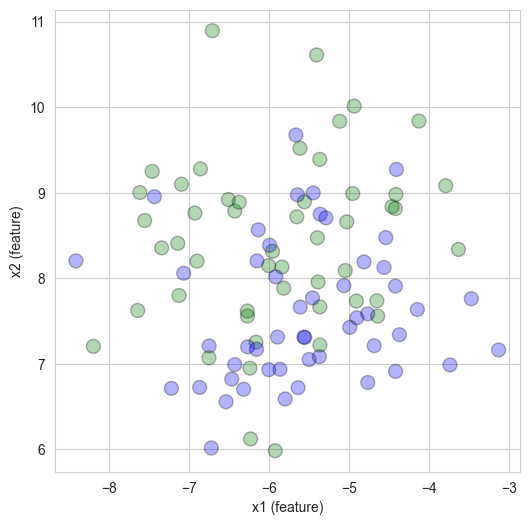

In [117]:
X, y = datasets.make_blobs(n_samples=100, random_state=5, centers=2)
plot_points(X, y)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [119]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((60, 2), (40, 2), (60,), (40,))

In [120]:
neighbors = range(1, 50)
neighbors

range(1, 50)

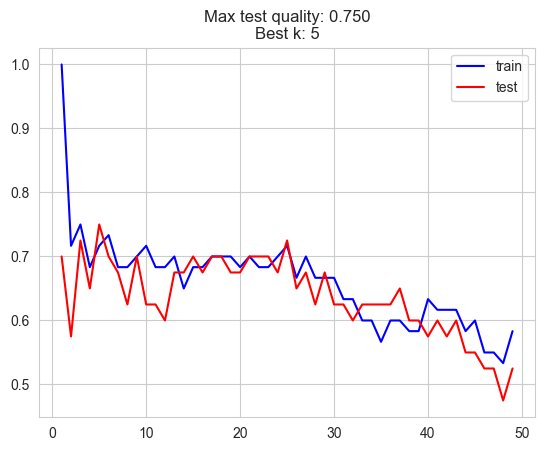

In [121]:
neighbors = range(1, 50)
accuracy_train = []
accuracy_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_train)
    preds_test = knn.predict(X_test)
    accuracy_train.append(accuracy_score(preds, y_train))
    accuracy_test.append(accuracy_score(preds_test, y_test))
    
plt.plot(neighbors, accuracy_train, color='blue', label='train')
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(accuracy_test), np.argmax(accuracy_test)+1))
plt.legend()
plt.show()

## Кросс-валидация (k-fold cross-validation)

Иногда данных не то чтобы очень много, а потестировать модель всё же хочется, да и получить устойчивые и надежные оценки качества модели - тоже не так плохо. 

Для такого случая была придумана очень полезная техника, использующася повсеместно - кросс-валидация. Наш изначальный датасет мы теперь будем делить не на train-validation-test, а на гораздо большее количество кусочков. В самом начале снова можно отложить тестовую выборку, на которой в самом конце мы проверим качество готовой модели. Далее берем оставшийся тренировочный датасет и делим его на папки (фолды, folds).

Например, задаём число фолдов равным 6 (обычно берется 3 или 5, но на картинке 6 блоков, так что для соответствия будем использовать 6). Теперь мы делим нашу тренировочную выборку на 6 равных кусков. На пяти их них обучаем модель, на шестом - меряем качество. Теперь берем другое сочетание фолдов и снова повторяем обучение/тестирование. Продолжаем, пока каждый из фолдов не поучаствовал в тестировании. Таким образом, мы получаем столько оценок качества, сколько изначально задали фолдов, и столько же раз нам пришлось нашу модель обучать и тестировать. Теперь эти оценки мы можем усреднить, посчитать стандартное отклонение и узнать как, в среднем, ошибается наша модель и какие интервалы у этой ошибки. 

Вычислительно кросс-валидации крайне затратна, но если модель учится быстро, а датасет не сильно большой - это отличный способ получить "честные" оценки качества модели.

Итак, в начале попробуем оценить качество определенной модели (kNN с числом соседей `n_neighbors=3`) на кросс-валидации.

In [122]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)
print('mean', scores.mean())
print('std', scores.std())

[0.65 0.7  0.65 0.5  0.6 ]
mean 0.62
std 0.06782329983125268


Помимо того что кросс-валидация позволяет оценивать качество модели без разбиения на train и test, это еще и удобный инструмент для подбора гипераметров.

Мы можем для каждой возможной комбинации гиперпараметров провести оценку на кросс-валидации и выбрать ту комбинацию гиперпараметров, которая дает наилучший результат.

Такая техника называется GridSearch на кросс-валидации.

In [123]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1, 2, 5, 10, 15, 20, 30, 40, 50, 75, 100]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,cv = 5, scoring = 'accuracy')
clf.fit(X, y)
print('Best params: ', clf.best_params_)
print('Best accuracy: ', clf.best_score_)

Best params:  {'n_neighbors': 10}
Best accuracy:  0.67


# Bonus: Тяжело в учении - легко в бою

Давайте попробуем применить kNN на реальных [данных](https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients#_=_).

Задача: предсказать ортопедические проблемы по измерениям костей таза и нижнего позвоночника. Быстро пройдемся по основным этапам работы с данными.

Загрузка - Статистики и Визуализация - Предобработка - Моделирование 

In [148]:
data = pd.read_csv('column_2C_weka.csv')

In [125]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [126]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [127]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

## Распределение целевой переменной

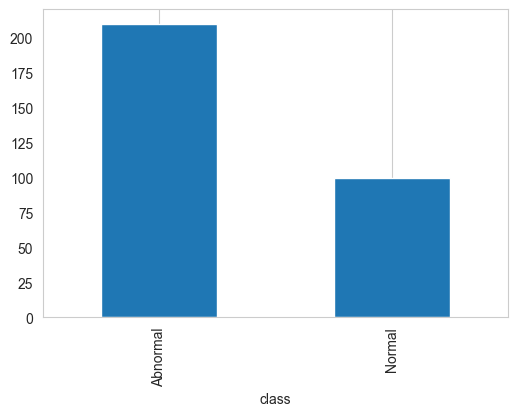

In [128]:
data['class'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [129]:
data['class'].value_counts(normalize=True)

class
Abnormal    0.677419
Normal      0.322581
Name: proportion, dtype: float64

Здесь же можно прикинуть наш **baseline** качества, с которым можно будет сравнивать результаты работы модели. Если у нас 68% одного класса и 32% другого, то даже если наша модель будет предсказывать сплошные `Abnormal`, то `accuracy` будет равна, в среднем, 68%.

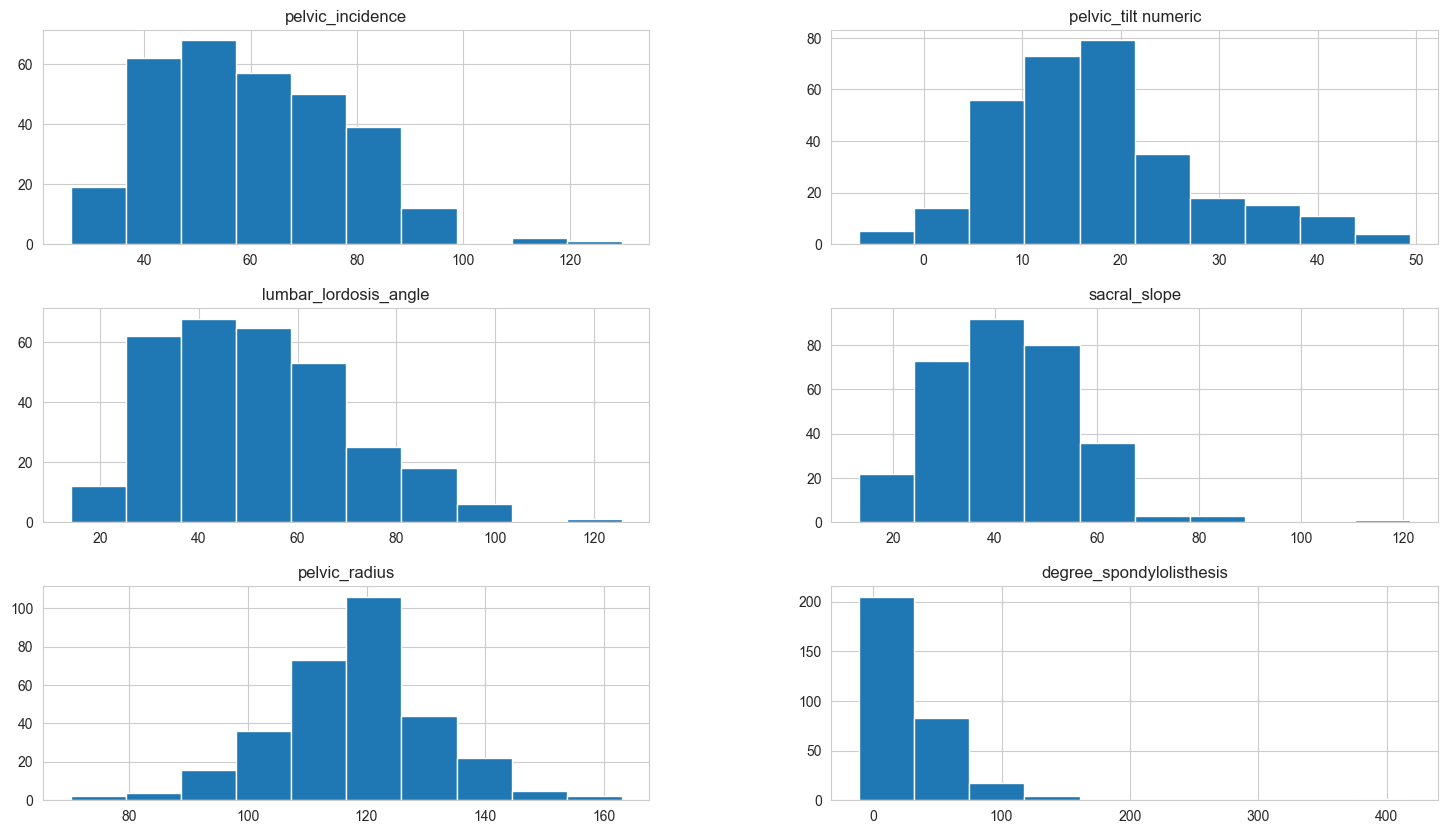

In [130]:
data.hist(figsize=(18, 10));

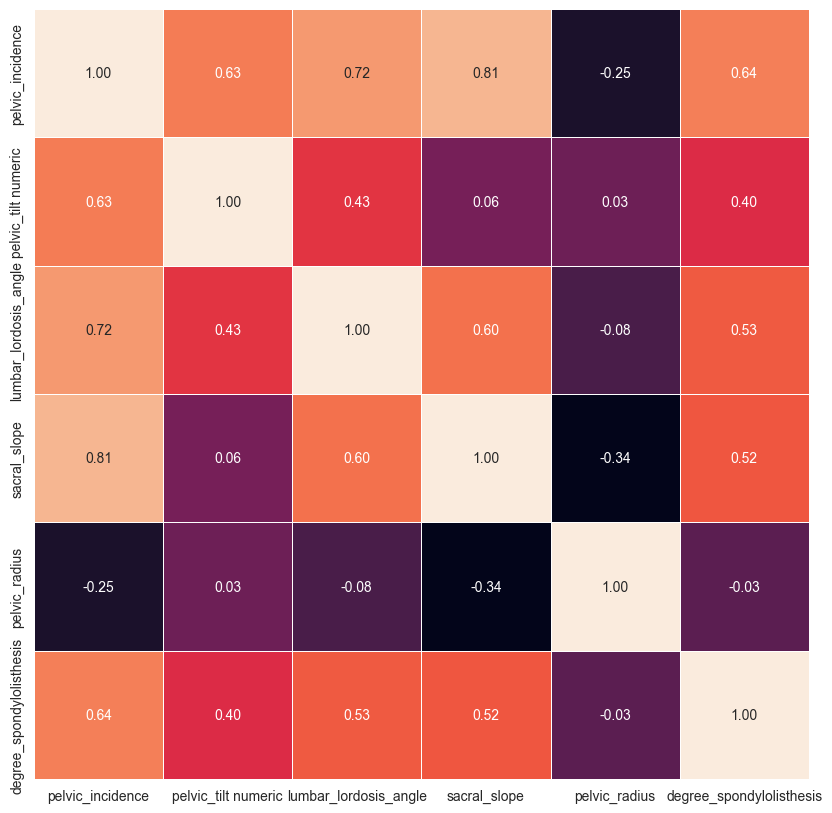

In [131]:
#correlation map
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop(['class'], axis=1).corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

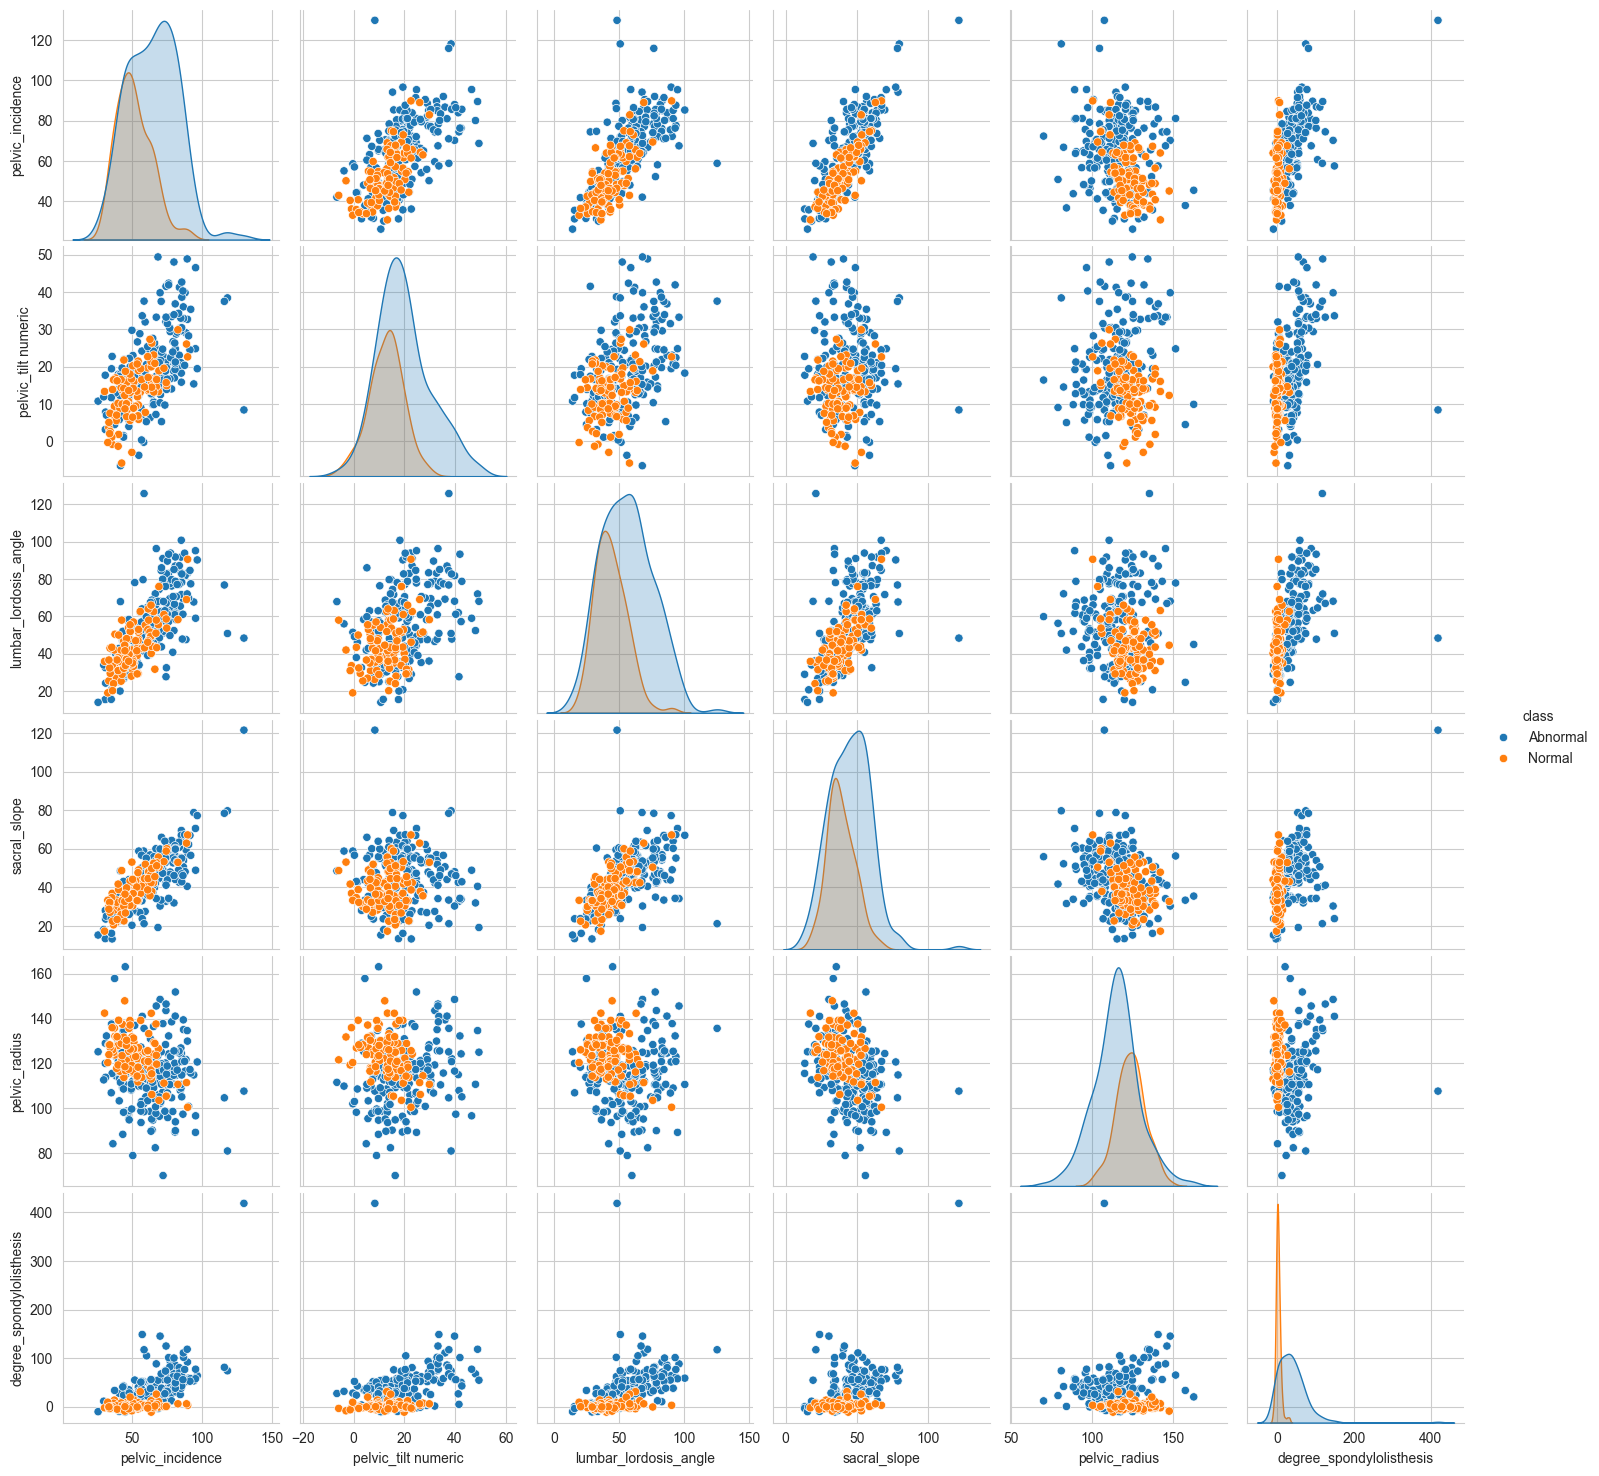

In [132]:
sns.pairplot(data, hue='class');

## Перекодируем целевую

In [133]:
data['class'] = data['class'].apply(lambda x: 1 if x=='Abnormal' else 0)

In [134]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


## Train-test split

Параметр `stratify` позволяет вам создавать такие разбиения, в которых распределения указанной переменной будут сохраняться. Очень полезно при дисбалансе классов, т.е. когда каких-то классов гораздо больше, чем других. 

Попробуйте ответить, почему? 

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'], test_size=0.20, random_state=42, stratify=data['class']
)

In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((248, 6), (62, 6), (248,), (62,))

In [137]:
y_train.value_counts(normalize=True)

class
1    0.677419
0    0.322581
Name: proportion, dtype: float64

In [138]:
y_test.value_counts(normalize=True)

class
1    0.677419
0    0.322581
Name: proportion, dtype: float64

## Scaling
### Важно! 
Учим на трейне - применяем на тесте. Практически все методы препроцессинга так или иначе используют информацию из выборки, например, при стандартизации считается среднее и дисперсия, значит, мы не хотим, чтобы информация из отложенной выборки просачивалась в тренировочную (data leak). 

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Подбор параметров разными способами

In [140]:
from sklearn.model_selection import cross_val_score

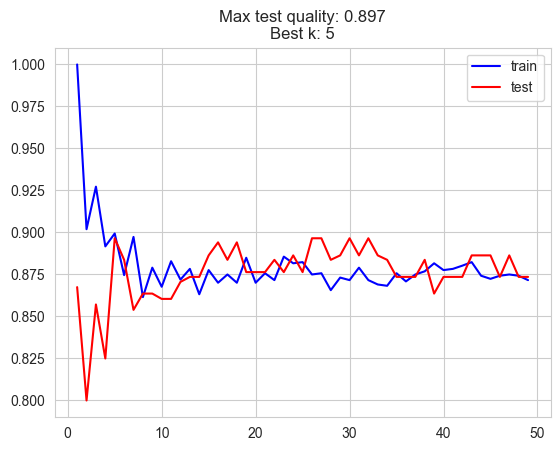

In [141]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

## GridSearchCV

In [142]:
%%time
from sklearn.model_selection import GridSearchCV

# параметр p отвечает за выбор метрики расстояния
param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best CV score: 0.885, best CV k: 33
Resulting test score: 0.886
CPU times: user 4.02 s, sys: 17.9 ms, total: 4.03 s
Wall time: 4.07 s


In [143]:
grid_search.best_estimator_.p

2

### Дополнительные материалы:
- [Теория про kNN](http://www.machinelearning.ru/wiki/index.php?title=Метод_ближайших_соседей)
- [Документация sklearn про knn](http://scikit-learn.org/stable/modules/neighbors.html)
- [Пример с Kaggle](https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification)